# In this notebook I compute the correlation function of the $D_{ls}$ and  $\textit{pseudo} D_{ls}$. The CAMB correlation function are required in both cases

Firs, I need compute the $C_{ls}$ (really $[Cl*l*(l+1)/2/\pi]*[(10⁶)²] = Dl$) to input in camb correlations function. CMB maps are required in all cases. I will take for full sky map a COM_CMB_IQU-smica_2048_R3.00_hm2 cmb map (https://pla.esac.esa.int/), a cut sky with mask where put 0 in contamination regions and 1 and the others. The correlatión function will be bounded with the dispertion of the synthetic cmb maps made by healpy using camb'Dls

1.$\textbf{I compute and plot the correlations functions of the CMB of  using \Lambda CDM parameters (Planck colaboration 2018).
For this propose I use the python library CAMB(Lewis et al. 2016)}.$

In [34]:
# Importing libraries
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

In [35]:
camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0,camb_path)
import camb
from camb import model, initialpower, correlations
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.3.5 installed at /home/akozameh/miniconda3/envs/CMB/lib/python3.10/site-packages/camb


In [36]:
#Calculate results for specified parameters and return CAMBdata instance for getting results.
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.66, ombh2=0.02242, omch2=0.11933, mnu=0.06, omk=0.001, tau=0.0561)
pars.InitPower.set_params(As=2.105e-9, ns=0.9665, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

In [37]:
#calculate results for these parameters
results = camb.get_results(pars)

In [38]:
#Set all CAMB parameters at once, including parameters which are part of the CAMBparams structure, as well as global parameters.
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


In [39]:
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
print(totCL.shape)
#Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).
ls = np.arange(totCL.shape[0])

(2551, 4)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

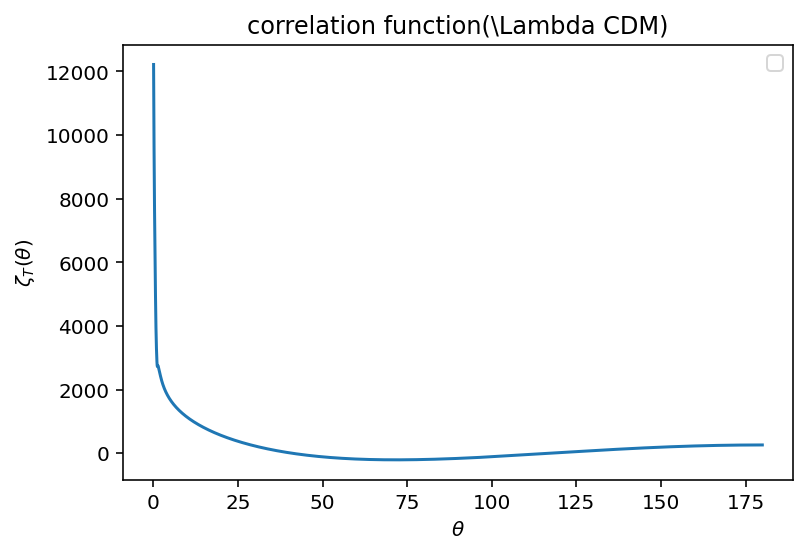

In [40]:
# YI use CAMB to calculate CMB correlation functions
corrs, xvalss, weightss = correlations.gauss_legendre_correlation(totCL)
#xvals=np.linspace(-1,1,2551)
theta=np.arccos(xvalss)*180/np.pi # sampled theta values in degrees
plt.plot(theta, corrs[:,0])
plt.ylabel(r'$\zeta_{T}(\theta)$')
plt.xlabel(r'$\theta$')
plt.legend()
plt.title('correlation function(\Lambda CDM)')
plt.show



In [41]:
xvalss

array([-0.99999956, -0.99999766, -0.99999425, ...,  0.99999425,
        0.99999766,  0.99999956])

In [42]:
corrs[:,0].shape

(2551,)

In [43]:
func_test = xvalss[1:]

In [44]:
xvalss[1:].shape

(2550,)

In [45]:
# Define the integration limits
intlim = (xvalss[1:] >= -1) * (xvalss[1:] < 1./2.)
print(intlim.sum())

1700


In [46]:
# dcos for all xvals
Dcosth = xvalss[1:]-xvalss[:-1]

In [47]:
# I do the integrals
np.sum(corrs[1:,0][intlim]**2*Dcosth[intlim])

35033.948937287096

In [48]:
1./24. +1./3.

0.375

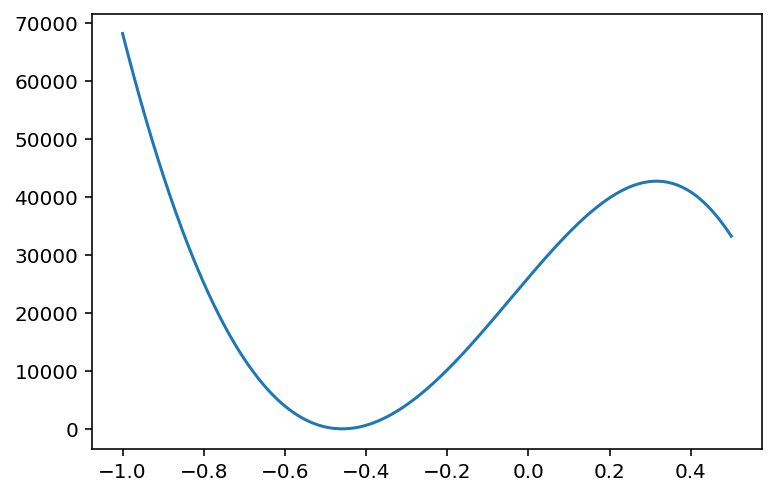

In [49]:
plt.plot(xvalss[1:][intlim],corrs[1:,0][intlim]**2)

In [50]:
65000*0.4/2. + 0.8*45000/2.

31000.0

In [51]:
theta

array([1.79945998e+02, 1.79876043e+02, 1.79805674e+02, ...,
       1.94325723e-01, 1.23957349e-01, 5.40020984e-02])

2. $\textbf{We used several data products from the Planck 2018
data release.1 We used the Planck SMICA component
separation maps, both full mission and half mission
(HM) maps2
, in our analyses.\\
I  download the COM_CMB_IQU-smica_2048_R3.00_hm2 CMB map (https://pla.esac.esa.int/) and with the help of healpix I will compute.\\
\\the power spectrum of the CMB. Then with CAMB I will compute the correlations function.}$

In [52]:
# import healpy
import healpy as hp

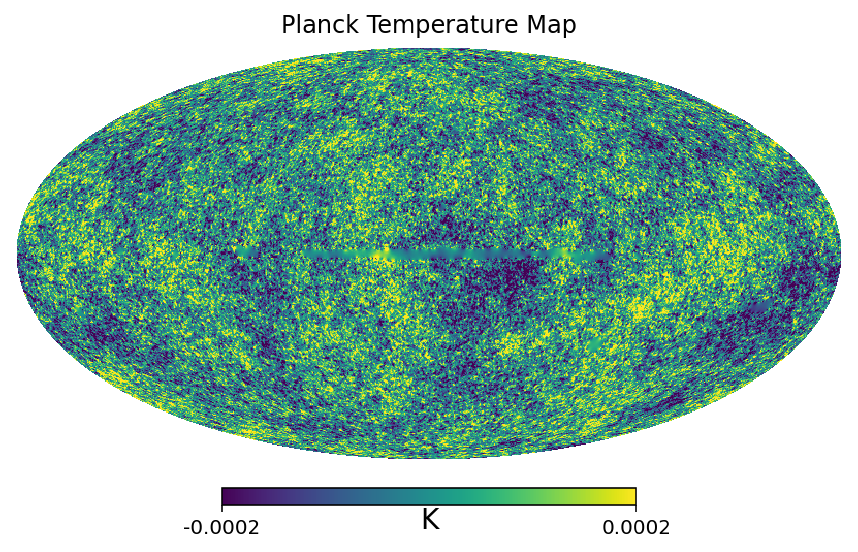

In [53]:
planck_IQU_SMICA=hp.read_map('/home/akozameh/COM_CMB_IQU-smica_2048_R3.00_hm2.fits')
fig=plt.figure(1)
hp.mollview(planck_IQU_SMICA, min=-0.0002,max=0.0002,
title='Planck Temperature Map',fig=1,unit='K')

Compute the $C_{ls}$ with anafast healpy routine

In [54]:
nside = 2048
lmax=2500
Cl = hp.anafast(planck_IQU_SMICA, lmax= lmax)
l=np.arange(len(Cl))

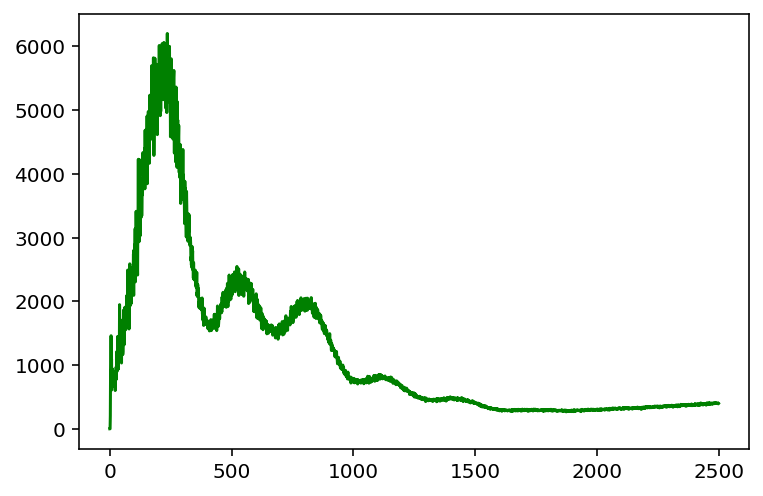

In [55]:
Dl=Cl*l*(l+1)*(1e12)/2/np.pi
plt.plot(l, Dl, color='g')

Compute the correlation function $\zeta_{T1}(\theta)$'

First I must make an arry with dimension four columns

In [56]:
D_l=np.zeros((len(Dl),4))
D_l[:,0]=Dl
D_l.shape

(2501, 4)

In [57]:

corr1, xvals, weights = correlations.gauss_legendre_correlation(D_l) 
#xvals1=np.linspace(-1,1,2501)
r1=np.arccos(xvals)*180/np.pi # sampled theta values in degrees

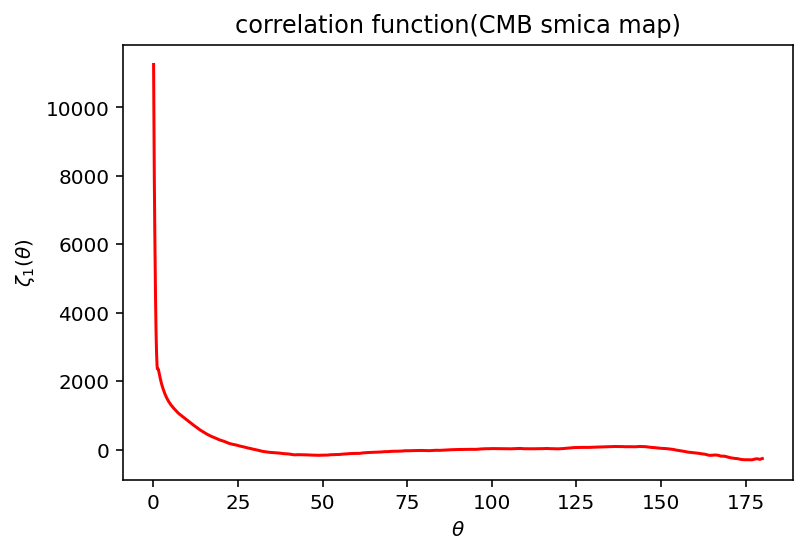

In [58]:
plt.plot(r1, corr1[:,0], color = 'r')
plt.ylabel(r'$\zeta_{1}(\theta)$')
plt.xlabel(r'$\theta$')
#plt.legend()
plt.title('correlation function(CMB smica map)')
plt.show()


3. $$\textbf{Because the residual contaminations of the milky way and dust we can't mesaure in that regions. Then we put a mask with 0 and 1. I compute the \textit{pseudo} $C_{ls}$ with namaster python routine.}$$

In [59]:
#import pymaster
import pymaster as nmt

We downloaded the COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits -- Temperature confidence mask with fsky = 77.9%.

In [60]:
mask=hp.read_map('/home/akozameh/COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits')

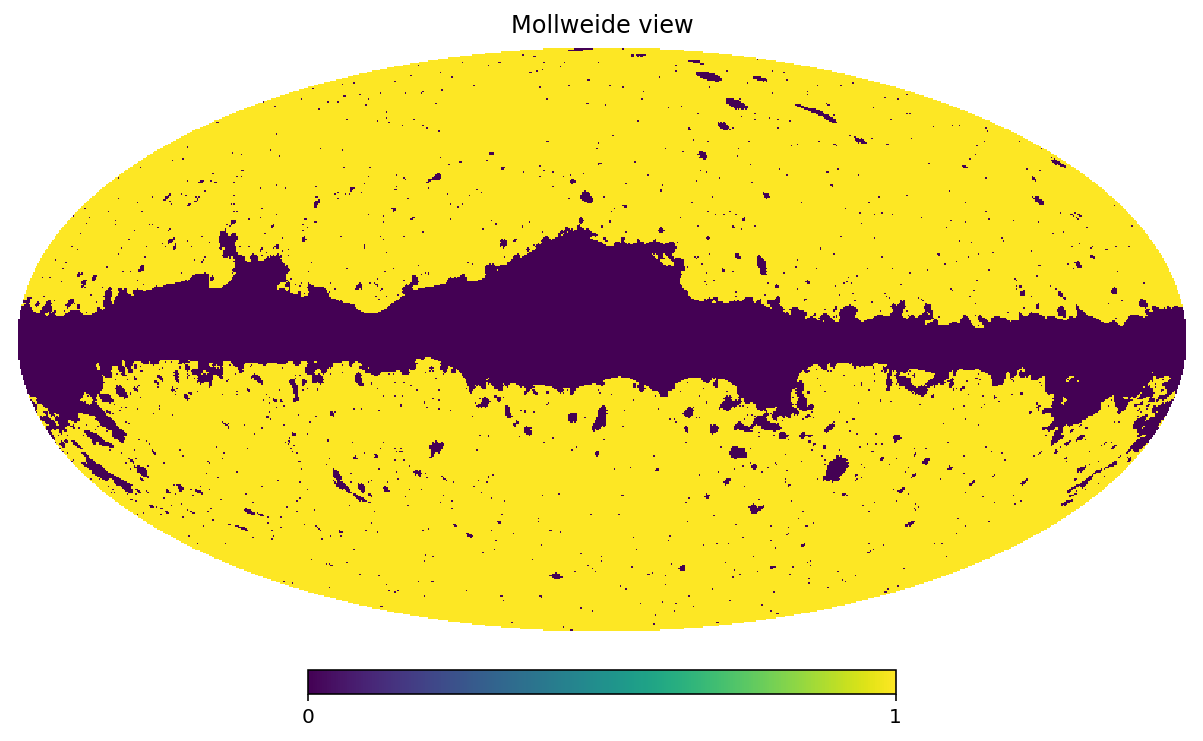

In [61]:
hp.mollview(mask)
plt.show()

In [62]:
# HEALPix resolution parameter used here
nside = 2048

In [63]:
# An NmtField object contains all the information describing the fields to correlate, including their observed maps, masks and contaminant templates.
f_0=nmt.NmtField(mask, [planck_IQU_SMICA])

In [64]:
# Initialize binning scheme with 4 ells per bandpower
# Convenience constructor for HEALPix maps with linear binning.
b = nmt.NmtBin.from_nside_linear(nside, 4)

In [65]:
# Compute MASTER estimator
# spin-0 x spin-0
#Computes the full MASTER estimate of the power spectrum of two fields (f1 and f2). 
cl_00 = nmt.compute_full_master(f_0, f_0, b)

In [66]:
# Shape of the pseudo Cls
cl_00.shape
cl_00[0]


array([2.17561436e-10, 7.35844194e-11, 3.20879069e-11, ...,
       1.28760109e-18, 1.37457963e-18, 1.56123462e-18])

In [67]:
#Returns an array with the effective multipole associated to each bandpower. 
#These are computed as a weighted average of the multipoles within each bandpower.
el = b.get_effective_ells()
el.shape

(1535,)

In [68]:
el.shape

(1535,)

(0.0, 2500.0)

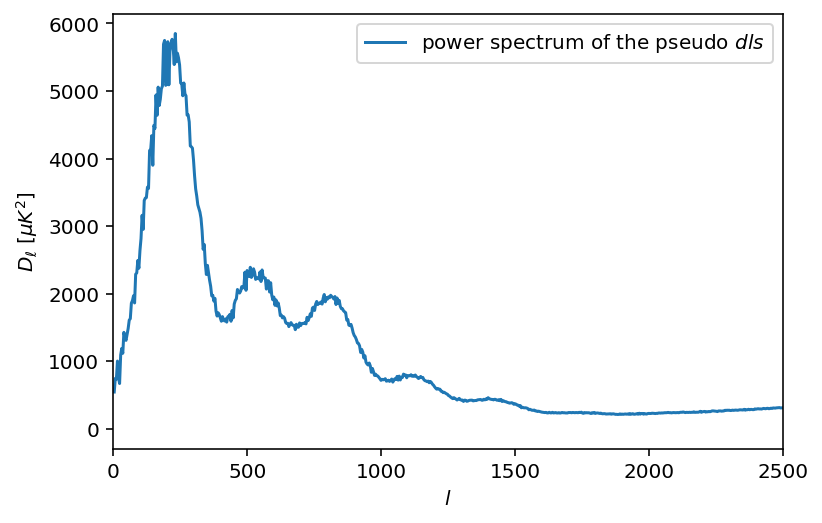

In [144]:
#plot results
dl=cl_00[0]*[(1e6)**(2)]*el*(el+1)/2/np.pi
plt.plot(el,dl, label='power spectrum of the pseudo $dls$')
plt.legend()
plt.xlabel(r'$l$')
plt.ylabel('$D_\ell~[\mu K^2]$')
plt.xlim(0,2500)

In [70]:
# Interpolation of the pseudo Dls
from scipy.interpolate import interp1d

In [71]:
# I define the interpolation with x**3
f=interp1d(el, dl, kind='cubic') 

In [72]:
# I define my news l
lnew=np.linspace(4, 2500, 2498)
# oncatenate

#pdl is the interpolation of the pseudo Dls
pdl_int=f(lnew)
lnew.shape

(2498,)

In [73]:
# Concatenate the ls
ljoin=np.concatenate((([0,0,2,3]),lnew))
# Concatenate the pseudo Dls
pDl_=np.concatenate((([0.0,0.0,203.36331868506028,918.9783866182479]),pdl_int ))


a. $ \textbf{I compute the correlation function $\zeta (\theta)$ of the pseudo $D_l$}$

In [74]:
# pDl_ is may new array
pDl_.shape

(2502,)

In [75]:
Dl=np.ones((len(pDl_),4))
Dl[:,0]=pDl_
Dl.shape

(2502, 4)

In [76]:
corr2, xvals_1, weights = correlations.gauss_legendre_correlation(Dl) 
#xvals2=np.linspace(-1,1,2502)
r2=np.arccos(xvals_1)*180/np.pi # sampled theta values in degrees

In [77]:
xvals_1
r2.shape

(2502,)

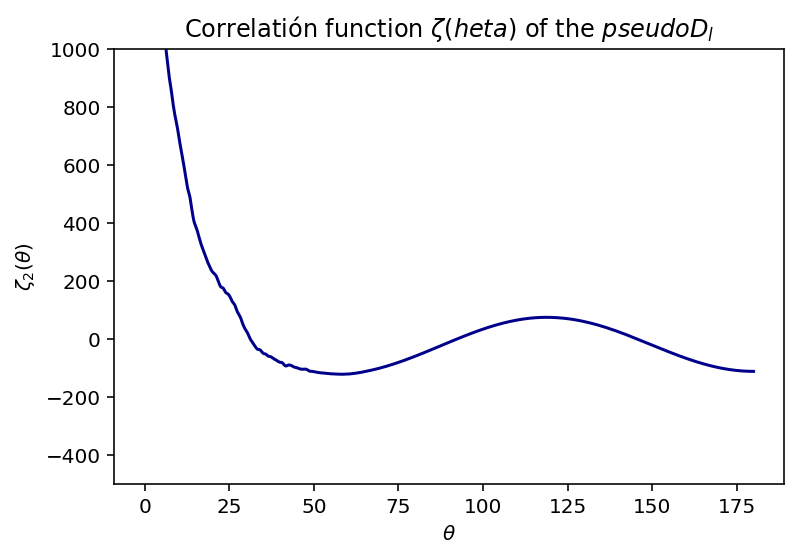

In [78]:
plt.plot(r2, corr2[:,0], color = 'darkblue')
plt.ylabel(r'$\zeta_{2}(\theta)$')
plt.xlabel(r'$\theta$')
plt.title('Correlatión function $\zeta (\theta)$ of the $pseudo D_{l}$')
plt.ylim(-500,1000)
plt.show()

4. $\textbf{In this section we are going to compute the errors. This will be done generating 100 cmb maps with theoretical $D_{ls}$ supplied by $\Lambda CDM$ throughout CAMB and Healpy python routine.}$

In [109]:
# Generating Nmaps cmb maps
Nmaps = 50
lmax  = 2501
nside = 2048

mapa_cl = np.zeros((Nmaps,50331648),np.float32)
for i in range(Nmaps):
    print("\rmapa #%d..."%i,end='')
    mapa_cl[i] = hp.sphtfunc.synfast(totCL[:,0], nside=nside, lmax =lmax, fwhm=np.radians(5/60))
print("listo!")

mapa #49...listo!


In [110]:
# Generating cls from maps through hp.anafast
cl = np.ones((Nmaps,lmax+1,4),np.float32)
for i in range(Nmaps):
    print('\rcl #%d...'%i,end='')
    cl[i,:,0] = hp.anafast(mapa_cl[i], lmax=lmax)
    

cl #49...

In [111]:
corr    = np.zeros((Nmaps,lmax+1,4),np.float32)
for i in range(Nmaps):
    print('\rcorr #%d...'%i)
    corr[i], xvals_2, weights = correlations.gauss_legendre_correlation(cl[i]) # all corr have the same xvals_2
    print('')
ra = np.arccos(xvals_2)*180/np.pi

corr #0...

corr #1...

corr #2...

corr #3...

corr #4...

corr #5...

corr #6...

corr #7...

corr #8...

corr #9...

corr #10...

corr #11...

corr #12...

corr #13...

corr #14...

corr #15...

corr #16...

corr #17...

corr #18...

corr #19...

corr #20...

corr #21...

corr #22...

corr #23...

corr #24...

corr #25...

corr #26...

corr #27...

corr #28...

corr #29...

corr #30...

corr #31...

corr #32...

corr #33...

corr #34...

corr #35...

corr #36...

corr #37...

corr #38...

corr #39...

corr #40...

corr #41...

corr #42...

corr #43...

corr #44...

corr #45...

corr #46...

corr #47...

corr #48...

corr #49...



$\textbf{ I add the two correlation function of the Cop. et al(2015) and Melia(2014) }$

In [112]:
# I charge data from Copi through csv file 
a=np.loadtxt('/home/akozameh/cmblss/data/dataset_1_1.csv', delimiter=',')
a.shape

(34, 2)

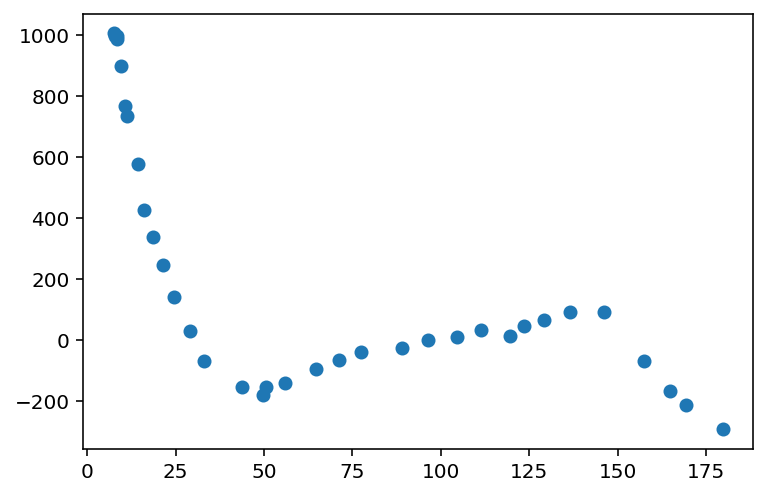

In [113]:
plt.scatter(a[:,0], a[:,1], label='Copi et al. (2015)')

In [114]:
a[:,1]

array([ 996.00112658,  896.72854763,  984.53623266, 1003.64196122,
        995.98655874,  766.93633366,  732.57078759,  576.01744257,
        427.12678395,  339.28267932,  247.62179932,  140.68653397,
         29.90535757,  -69.41820883, -153.61306833, -138.6081881 ,
        -66.40994887,  -24.80418389,   31.97399154,   92.30672112,
        -68.2382134 , -290.08463918, -213.53061433, -167.63461903,
         92.51067095,   65.9462058 ,   46.98615569,   12.71530061,
          9.21901784,    1.76028126,  -39.82363196,  -92.98898185,
       -153.75874678, -180.46160644])

In [115]:
# I charge data from Melia through csv file 
b=np.loadtxt('/home/akozameh/cmblss/data/dataset_2_2.csv', delimiter=',')

In [116]:
b[:,0]

array([ 18.12731433,  18.90430622,  19.68878719,  20.86270023,
        22.85666736,  26.06573747,  28.87039734,  31.68441856,
        36.15352611,  43.50780112,  51.74953193,  57.96172249,
        63.33700853,  67.06282505,  71.618057  ,  74.51258581,
        79.46661119,  81.9361348 ,  84.00124818,  88.55086332,
        91.85354691,  95.15248596,  97.22321614,  99.29394633,
       104.64302059, 111.64530892, 108.35947576, 119.06324111,
       115.36363636, 123.20282921, 128.58560433, 132.71021427,
       137.26170169, 140.55689619, 143.03578115, 147.13417932,
       149.58498024, 152.01893073, 155.28229665, 155.67172873,
       157.71437487, 157.70314125, 159.32078219, 160.54337425,
       162.18161015, 162.57478677, 163.38173497, 163.36488454,
       165.00124818, 166.65820678, 166.64884543, 167.45579363,
       168.26835864, 169.90097774, 169.89536093, 169.472228  ,
       169.45724984, 170.68358644, 172.72061577, 175.9895985 ,
       178.47784481, 179.70605367])

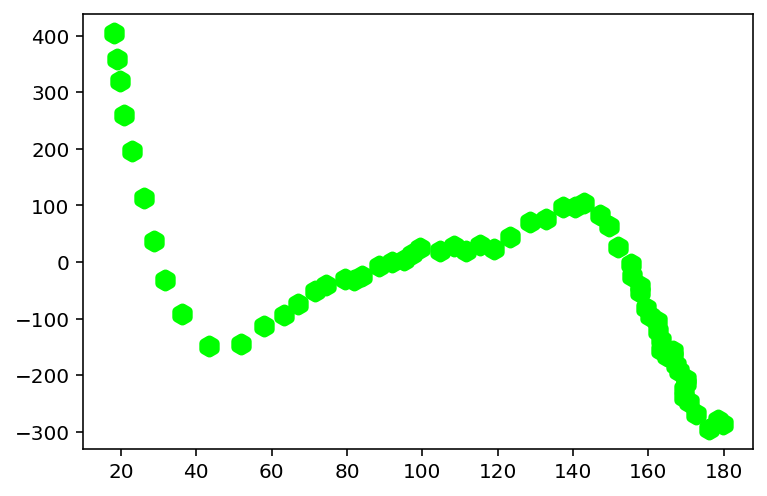

In [117]:
plt.scatter(b[:,0], b[:,1], marker='h',color='lime',alpha=1,linewidths=5, label='Melia (2014)')

In [118]:
media = np.mean(corr,axis=0)
sigma = np.std(corr,axis=0)

In [119]:
sigma[:,0].shape

(2502,)

In [120]:
media[:,0]

array([  290.37537,   290.20447,   289.93335, ...,  9419.965  ,
       10613.282  , 11662.229  ], dtype=float32)

In [121]:
ra

array([1.79944941e+02, 1.79873616e+02, 1.79801869e+02, ...,
       1.98130703e-01, 1.26384486e-01, 5.50594821e-02])

In [122]:
r2

array([1.79944941e+02, 1.79873616e+02, 1.79801869e+02, ...,
       1.98130703e-01, 1.26384486e-01, 5.50594821e-02])

In [123]:
corr2[:,0]

array([ -112.8931    ,  -112.89146572,  -112.88864862, ...,
        8896.41314093, 10046.47815003, 11144.27972638])

In [124]:
corr2[:,0][0]

-112.8930999984698

In [125]:
r2[0]

179.94494051788

In [ ]:
a=corr2[:,0]

<ErrorbarContainer object of 3 artists>

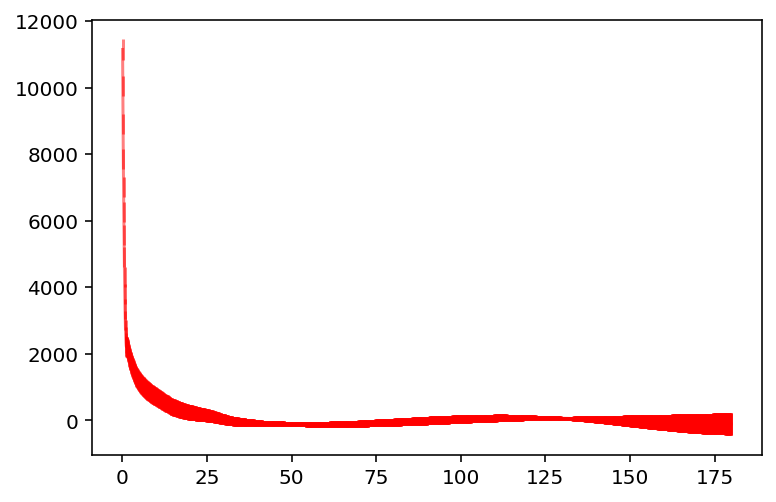

In [126]:
plt.errorbar(r2,corr2[:,0], yerr=sigma[:,0], color= 'red', 
             label=' $C(\theta)$ with the 68 % cosmic variance confidence intervals',alpha=0.5)

(-400.0, 400.0)

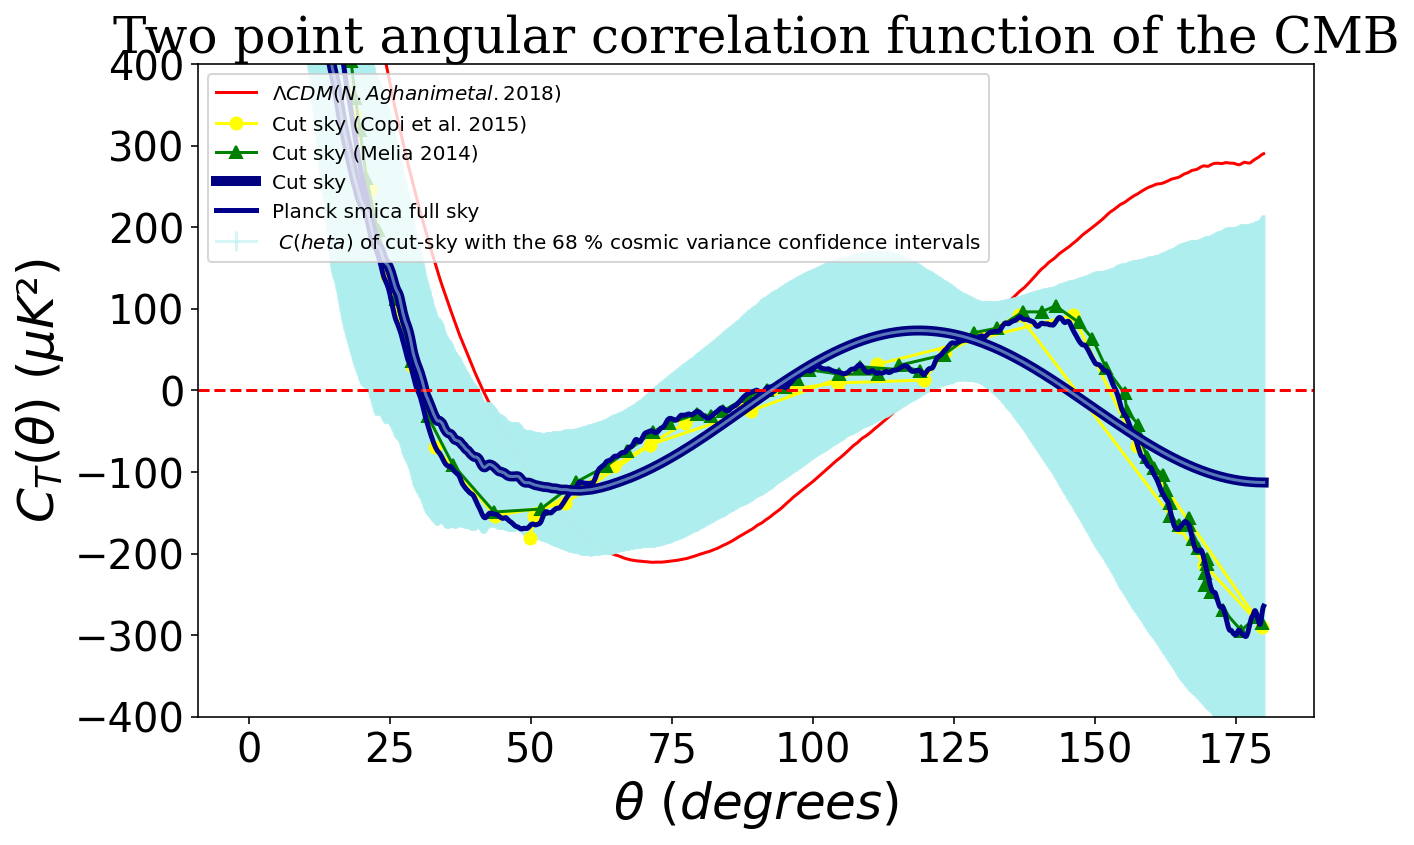

In [143]:
# Plotting the results
plt.figure(figsize=(10,6))

# axis label
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 25,}

plt.plot(ra,media[:,0],  color= 'red', label='$\Lambda CDM ( N. Aghanim et al. 2018)$')
             
plt.errorbar(r2,corr2[:,0], yerr=sigma[:,0], color= 'paleturquoise', 
             label=' $C(\theta)$ of cut-sky with the 68 % cosmic variance confidence intervals',alpha=0.5)
plt.plot(a[:,0], a[:,1],marker='o', color='yellow', alpha= 1,label='Cut sky (Copi et al. 2015)')
plt.plot(b[:,0], b[:,1], marker='^',color='green',alpha=1, label='Cut sky (Melia 2014)')
plt.plot(r2, corr2[:,0],color= 'navy',alpha=1,linewidth=5,label = 'Cut sky ')
#plt.plot(theta, corrs[:,0],'--', color='red', linewidth=5,alpha=1,label='$\Lambda CDM ( N. Aghanim et al. 2018) $')
plt.plot(r1, corr1[:,0], color='darkblue',linewidth=2.5,alpha=1.0, label ='Planck smica full sky')
plt.xticks(fontsize = 20)
plt.yticks(fontsize=20)
plt.title('Two point angular correlation function of the CMB', fontdict=font)
plt.ylabel(r'$C_{T}(\theta)~(\mu K²)$',fontdict=font)
plt.xlabel(r'$\theta~(degrees)$',fontdict=font)
plt.legend(loc='best')
plt.axhline(y=0.0, color='r', linestyle='--')

plt.ylim(-400,400)

$\textbf{In this part I am going to compute the  statistic $S_{1/2}$ using scipy integrate}$

In [155]:
# Define the integration limits
# cos theta is between -1 and 172
intlim_1 = (xvals_1[1:] >= -1) * (xvals_1[1:] < 1./2.)
print(intlim_1.sum())

1667


In [159]:
# dcos for all xvals
Dcosth = xvals_1[1:]-xvals_1[:-1]

In [160]:
S_half=np.sum(corr2[1:,0][intlim_1]**2*Dcosth[intlim_1])

In [161]:
print(S_half)

6261.742272356329


$ \textbf{I analize the error of the integrator} $

In [123]:
from scipy import integrate
from numpy import sin, pi

In [125]:
theta_2=np.linspace(0,2*np.pi,100)*180/np.pi

In [126]:
# The first argument to quad is a “callable” Python object (i.e., a function, method, or class instance).
result = integrate.quad(lambda theta: np.sin(theta), 0, 4.5*180/np.pi)
result

(0.024192153734315935, 1.84962609035581e-12)

In [127]:
#  sin manually integrated
d=np.cos(0)-np.cos(4.5*180/np.pi)
d

0.024192153734253985

In [128]:
print(result-d)

[ 6.19504448e-14 -2.41921537e-02]


$\textbf{To interpolate the correlation function to integrate S_1/2}$

In [129]:
np.arccos(xvals_1)[1]


3.1393868281857706

In [130]:
cl_00[0].shape

(1535,)

In [131]:
# We cannot plot pseudoCls*sin(np.arccos(xvals_1)) directly, I must be to define a new intervals for it.
p_l=1535

#chi[t]=np.zeros(p_l+1)
for t in range(p_l):
    print('\rchi #%d...'%t,end='')
    chi[t]=np.arccos(xvals_1)[t]
chi

chi #0...

NameError: name 'chi' is not defined

In [132]:
np.arccos(xvals_1)

array([3.14063168e+00, 3.13938683e+00, 3.13813462e+00, ...,
       3.45803311e-03, 2.20582540e-03, 9.60969247e-04])

In [133]:
np.min(r2)

0.05505948211999985

In [134]:
r2.shape

(2502,)

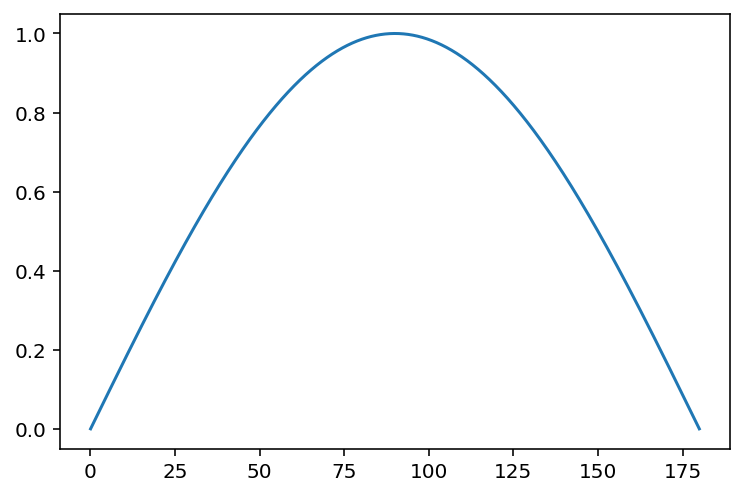

In [135]:
plt.plot(r2, np.sin(np.arccos(xvals_1)))

In [136]:
np.max(r2)

179.94494051788

In [137]:
# interpolation of the funtion
# arccos(xvals_1) is angle measured in radians
chi=interp1d(r2, (corr2[:,0])**2*np.sin(np.arccos(xvals_1)), kind='nearest') 

In [138]:
#Estimation of the thetas
theta=np.linspace(0.05505948211999985,179.94494051788,2502)
corr_new=chi(theta)

In [222]:
# I define a function to can integrate
myI=np.vectorize(corr_new)

In [139]:
# Integration of the correlation function
S=integrate.quad(chi, np.pi/3, np.pi )

/tmp/ipykernel_23398/2816671281.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  S=integrate.quad(chi, np.pi/3, np.pi )


In [140]:
S

(263943.20379462955, 40.224592992744874)